<a href="https://colab.research.google.com/github/ankitoscar/handsonml/blob/main/chapter_11/chapter_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building an image classifier using the Sequential API 
Here, we will make an image classifier using keras' Sequential API. The image classifier would be made for the Fashion MNIST dataset which has 70,000 grayscales of different fashion items having size 28 x 28.

In [2]:
# Importing libraries 
import tensorflow as tf 
from tensorflow import keras 
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [3]:
# Loading the Fashion MNIST dataset 
fashion_mnist = keras.datasets.fashion_mnist # Utility function for loading 
                                             # common dataset 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
                                            # Splitting data into train and test

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Shapes and datatype of dataset 
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [5]:
# Dividing the full training dataset to a train and valid set with scaling 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255
                  # Dividing by 255 to scale the input 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
# Making labels list 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_names[y_train[0]] # Class of y_train[0]

'Coat'

In [7]:
# Making the neural network using Sequential API 
model = keras.models.Sequential() # Initialising the model 
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) # Output layer

In [8]:
# Summary of the model showing layers, types, trainable and non-trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compiling the model 
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [10]:
# Training and evaluating the model 
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0134 - accuracy: 0.6793 - val_loss: 0.5085 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5052 - accuracy: 0.8250 - val_loss: 0.4394 - val_accuracy: 0.8544
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4478 - accuracy: 0.8449 - val_loss: 0.4279 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4162 - accuracy: 0.8543 - val_loss: 0.4052 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3925 - accuracy: 0.8618 - val_loss: 0.4016 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3936 - accuracy: 0.8622 - val_loss: 0.3775 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3650 - accuracy: 0.8703 - val_loss: 0.3853 - val_accuracy:

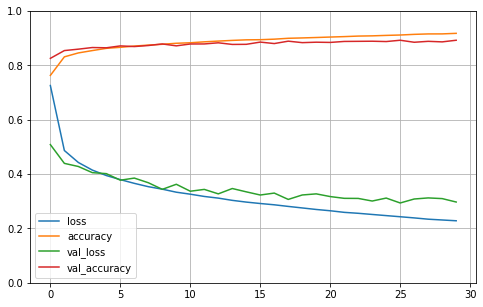

In [11]:
# Plotting the parameters of the trained model 

# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe of the history object 
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set vertical range from 0-1
plt.show()

In [12]:
# Evaluating the model 
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 65.0941 - accuracy: 0.8474


[65.09407806396484, 0.8474000096321106]

The model has performed with an accuracy of 86% on the test set, which shows that the model is able to generalise easily.

In [13]:
# Predicting on data using the model 

# Importing numpy 
import numpy as np

print(model.predict(X_test[:3]))
y_pred = model.predict_classes(X_test[:3])
print(np.array(class_names)[y_pred])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Ankle Boot' 'Pullover' 'Trouser']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Building a Regression model using the Sequential API
Here, we will make a regression model on the California housing problem using a neural network. This is a simpler dataset as it has only numerical values in stored in columns.

In [14]:
# Importing dataset from Scikit-Learn
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset using utility function 
housing = fetch_california_housing()

# Splitting the data into train, test and valid sets 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data
                                                              , housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Initialising scaler to scale the data 
scaler = StandardScaler() 

# Scaling the data 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [15]:
# Making the model 
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))

# Evaluating 
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])
print(y_pred)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3921 - val_loss: 0.7929
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7492 - val_loss: 0.4482
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4366 - val_loss: 0.4131
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4003 - val_loss: 0.4128
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3902 - val_loss: 0.3956
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3786 - val_loss: 0.3912
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3823 - val_loss: 0.4369
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3810 - val_loss: 0.3986
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3708 - val_loss: 0.3895
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3636 - val_loss: 0.3852

## Building complex models using the Functional API
Keras also has another API called Functional API, which can be used to create non-sequential models. Here, we will make one such model using it.

### Wide and Deep Network
This neural network tries to create two paths between input and output as to obtain output via a long and a short path.

In [16]:
# Making a wide and deep network 
_input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(_input_) # Using Functional API
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([_input_, hidden2]) # Creating long and short path
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[_input_], outputs=[output])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [18]:
# Compiling the model 
model.compile(loss='mean_squared_error', optimizer='sgd')

# Training the model 
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3542 - val_loss: 5.9917
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2853 - val_loss: 10.6351
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [=========================

In [19]:
# Predicting on test data 
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])
print(y_pred)

162/162 [==============================] - 0s 918us/step - loss: nan
[[nan]
 [nan]
 [nan]]


We can also configure the neural network to take different subsets of features in different paths and then give the output.

In [20]:
# Making a network to take different features in different paths 
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [22]:
# Compiling the model 
model.compile(loss='mse', optimizer='sgd')

# Modifying input shapes of data 
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Training the model 
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A,X_valid_B), y_valid))
# Evaluating 
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2062 - val_loss: 1.4005
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0401 - val_loss: 0.5049
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5622 - val_loss: 1.9959
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1961 - val_loss: 0.4483
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5290 - val_loss: 0.4541
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4196 - val_loss: 0.6226
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4888 - val_loss: 0.4202
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4069 - val_loss: 0.4004
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3898 - val_loss: 0.6604
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4448 - val_loss: 0.3959

In [23]:
# Making a neural network to give more than one output 
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2) # auxilary output 
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         input_5[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
____________________________________________________________________________________________

In [25]:
# Compiling the model 
model.compile(loss = ['mse', 'mse'],loss_weights=[0.9, 0.1], optimizer = 'sgd')

# Training the model 
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid])
)

# Getting all losses
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

print(total_loss, main_loss, aux_loss)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.6310 - dense_13_loss: 1.4891 - dense_14_loss: 2.9083 - val_loss: 0.6014 - val_dense_13_loss: 0.5376 - val_dense_14_loss: 1.1756
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6852 - dense_13_loss: 0.6311 - dense_14_loss: 1.1718 - val_loss: 0.5377 - val_dense_13_loss: 0.4950 - val_dense_14_loss: 0.9216
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5188 - dense_13_loss: 0.4727 - dense_14_loss: 0.9337 - val_loss: 0.6973 - val_dense_13_loss: 0.6780 - val_dense_14_loss: 0.8702
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5233 - dense_13_loss: 0.4855 - dense_14_loss: 0.8637 - val_loss: 0.4525 - val_dense_13_loss: 0.4220 - val_dense_14_loss: 0.7263
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4547 - dense_13_loss: 0.4223 - dense_14_loss: 0.7462 - val_loss: 0.4403 - val_dense_13_loss: 0.4147 - val_de

## Building a model using Subclassing API
In, this method we can wrap our model around a class which can help us to do operations on it like loops, if-statements, etc.

In [26]:
# Building a model with Subclassing API
class WideAndDeep(keras.models.Model):
  def __init__(self, units=30, activation='relu', **kwargs): # constructor
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs 
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    
    return main_output, aux_output

model = WideAndDeep()

## Callbacks and Tensorboard

### Callbacks 
Callbacks are used to analyse a neural network at different stages of training. Callbacks can be used to save the model at different stages as well as to perform early stopping.

In [27]:
# Making a neural network with model saving and early stopping callbacks 
# Making the model 
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Making callbacks 
checkpoint_cb = keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True) # Model saving 
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data = (X_valid, y_valid))

# Evaluating 
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])
print(y_pred)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 3.0185 - val_loss: 1.0762
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5663 - val_loss: 9.4769
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7360 - val_loss: 98.4523
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 4.9648 - val_loss: 3.0263
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 48.7182 - val_loss: 0.7103
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5160 - val_loss: 0.9036
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4872 - val_loss: 0.6902
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4265 - val_loss: 0.4680
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4117 - val_loss: 0.4420
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4035 - val_

In [28]:
# Custom callback for showing val_loss/loss at the end of epoch 
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs['val_logs'] / logs['loss']))

### Tensorboard 
Tensorboard is a graphical tool provided by Tensorflow to visualise the performance of our neural network. It does this by taking the logs generated during the training process.


In [29]:
# Creating log directory returning function 
import os
import time 

root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

In [30]:
# Making a model with tensorboard callback 
# Making the model 
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

# Logs directory 
run_logdir = get_run_logdir()

# Making tensorboard callback 
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid),
                    callbacks=[tensorboard_cb])


Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.2758 - val_loss: 2.3385
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 1.1427 - val_loss: 0.6976
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==========================

## Fine-Tuning Neural Network Hyperparameters 
Neural networks have a lot of hyperparameters, tuning even a single one can significantly effect the performance of the network. This can be easily achieved by using a wrapper available in Keras which helps us to use the RandomizedSearchCV() and GridSearchCV() available in scikit-learn.

In [31]:
# Making a function to return a neural network 
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  options = {"input_shape": input_shape}
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
    options = {}
  model.add(keras.layers.Dense(1, **options))
  optimizer = keras.optimizers.SGD(learning_rate)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [32]:
# Hyper parameter tuning 
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_test[:3])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.3796 - val_loss: 1.4182
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8680 - val_loss: 1.1637
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 1.8712 - val_loss: 0.4888
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5081 - val_loss: 0.4544
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4850 - val_loss: 0.4329
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4500 - val_loss: 0.4159
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4204 - val_loss: 0.4050
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4145 - val_loss: 0.3987
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4136 - val_loss: 0.3958
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4145 - val_lo

In [34]:
#  Using RandomizedSearchCV 
from scipy.stats import reciprocal 
from sklearn.model_selection import RandomizedSearchCV 

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1,100).tolist(),
    'learning_rate': reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv =3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.6231 - val_loss: 0.6628
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7553 - val_loss: 0.5149
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5486 - val_loss: 0.4439
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4667 - val_loss: 0.4158
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4130 - val_loss: 0.3970
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3876 - val_loss: 0.3962
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3802 - val_loss: 0.3933
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3797 - val_loss: 0.3925
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3693 - val_loss: 0.3734
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3783 - val_lo

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fa90227ef50>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.023470944869483295,
                                                          0.027605053808623214,
                                                          0.0011340912837946914,
                                                          0.000496143150881143,
                                                          0.0026785757266953865,
                                                          0.001832590150564708,
                                                          0.00085531...
                                                          0.014860046014968679,
                                                          0.007678807279515986,
                                                          0.00054

In [35]:
# Seeing the best parameters 
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

{'n_neurons': 77, 'n_hidden': 3, 'learning_rate': 0.00533094149012752}
-0.31627370913823444
